In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [21]:
data=pd.read_excel(r'C:\Farmer_Income_Predict\Dataset\dataset.xlsx')
data.describe()

,year,value
count,49.00000,49.000000
mean,1997.00000,1391.758958
std,14.28869,597.033758
min,1973.00000,264.750000
25%,1985.00000,1066.401289
50%,1997.00000,1385.980000
75%,2009.00000,1717.983291
max,2021.00000,2704.680083


In [3]:
data['DATE']=pd.to_datetime(data['year'],infer_datetime_format=True)
index=data.set_index(['DATE'])
from datetime import datetime
index.head()

,year,value
DATE,,
1970-01-01 00:00:00.000001973,1973,264.75
1970-01-01 00:00:00.000001974,1974,334.75
1970-01-01 00:00:00.000001975,1975,283.30
1970-01-01 00:00:00.000001976,1976,360.66
1970-01-01 00:00:00.000001977,1977,437.10


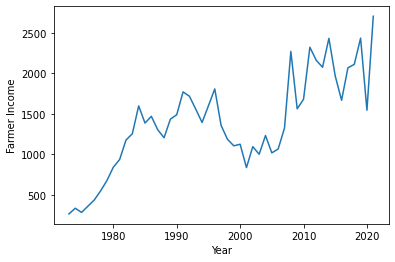

In [4]:
plt.xlabel("Year")
plt.ylabel("Farmer Income")
plt.plot(data['year'],data['value'])
plt.savefig('sequence.png', dpi=600)

In [5]:
from statsmodels.tsa.stattools import adfuller
print("Observations of Dickey-fuller test")
dftest = adfuller(data['value'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

Observations of Dickey-fuller test
Test Statistic                 -1.474126
p-value                         0.546270
#lags used                      2.000000
number of observations used    46.000000
critical value (1%)            -3.581258
critical value (5%)            -2.926785
critical value (10%)           -2.601541
dtype: float64


In [6]:
data['df_log']=np.sqrt(data['value'])
data['df_diff_1']=data['df_log'].diff().dropna()
data['df_diff_1']=data['df_diff_1'].dropna()

In [7]:
from statsmodels.tsa.stattools import adfuller
print("Observations of Dickey-fuller test")
dftest = adfuller(data['df_diff_1'].dropna(),autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

Observations of Dickey-fuller test
Test Statistic                -6.078143e+00
p-value                        1.108737e-07
#lags used                     1.000000e+00
number of observations used    4.600000e+01
critical value (1%)           -3.581258e+00
critical value (5%)           -2.926785e+00
critical value (10%)          -2.601541e+00
dtype: float64


In [8]:
from sklearn.linear_model import LinearRegression
from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm
#define response variable
y = data['year']

#define predictor variables
x = data[['value']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit regression model
model = sm.OLS(y, x).fit()
#perform White's test
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))



{'Test Statistic': 12.457906054704887, 'Test Statistic p-value': 0.0019715149386920127, 'F-Statistic': 7.841144508225538, 'F-Test p-value': 0.001174191803920481}


C:\Users\91629\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [9]:
data

,year,value,DATE,df_log,df_diff_1
0,1973,264.750000,1970-01-01 00:00:00.000001973,16.271140,NaN
1,1974,334.750000,1970-01-01 00:00:00.000001974,18.296174,2.025034
2,1975,283.300000,1970-01-01 00:00:00.000001975,16.831518,-1.464656
3,1976,360.660000,1970-01-01 00:00:00.000001976,18.991051,2.159532
4,1977,437.100000,1970-01-01 00:00:00.000001977,20.906937,1.915886
5,1978,549.140000,1970-01-01 00:00:00.000001978,23.433736,2.526800
6,1979,677.200000,1970-01-01 00:00:00.000001979,26.023067,2.589330
7,1980,840.900000,1970-01-01 00:00:00.000001980,28.998276,2.975209
8,1981,936.700000,1970-01-01 00:00:00.000001981,30.605555,1.607279
9,1982,1176.100000,1970-01-01 00:00:00.000001982,34.294314,3.688759


In [10]:
data.head()

,year,value,DATE,df_log,df_diff_1
0,1973,264.75,1970-01-01 00:00:00.000001973,16.271140,NaN
1,1974,334.75,1970-01-01 00:00:00.000001974,18.296174,2.025034
2,1975,283.30,1970-01-01 00:00:00.000001975,16.831518,-1.464656
3,1976,360.66,1970-01-01 00:00:00.000001976,18.991051,2.159532
4,1977,437.10,1970-01-01 00:00:00.000001977,20.906937,1.915886


In [11]:
from scipy.stats import kruskal

def seasonality_test(series):
        seasoanl = False
        idx = np.arange(len(series.index)) % 12
        H_statistic, p_value = kruskal(series, idx)
        if p_value <= 0.05:
            seasonal = True
        return p_value, H_statistic
seasonality_test(data['value'])

(1.421793530281681e-17, 72.81792890460001)

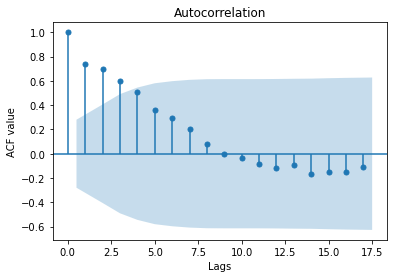

In [12]:
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot
plot_acf(data['value'])
pyplot.xlabel('Lags')
pyplot.ylabel('ACF value')
plt.savefig('ACF_Raw.png', dpi=600)
pyplot.show()

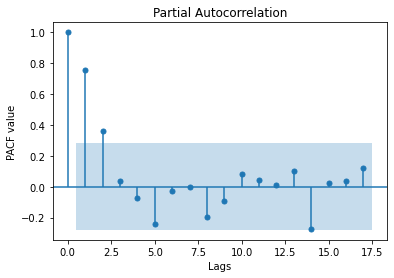

In [13]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
plot_pacf(data['value'])
pyplot.xlabel('Lags')
pyplot.ylabel('PACF value')
plt.savefig('PACF_Raw.png', dpi=600)
pyplot.show()

In [14]:
data.head()

,year,value,DATE,df_log,df_diff_1
0,1973,264.75,1970-01-01 00:00:00.000001973,16.271140,NaN
1,1974,334.75,1970-01-01 00:00:00.000001974,18.296174,2.025034
2,1975,283.30,1970-01-01 00:00:00.000001975,16.831518,-1.464656
3,1976,360.66,1970-01-01 00:00:00.000001976,18.991051,2.159532
4,1977,437.10,1970-01-01 00:00:00.000001977,20.906937,1.915886


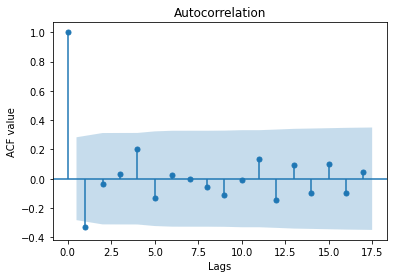

In [15]:
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot
plot_acf(data['df_diff_1'].dropna())
pyplot.xlabel('Lags')
pyplot.ylabel('ACF value')
plt.savefig('ACF_FDiff.png', dpi=600)
pyplot.show()

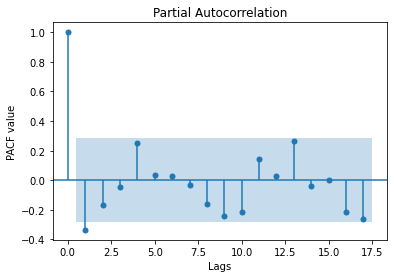

In [16]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
plot_pacf(data['df_diff_1'].dropna())
pyplot.xlabel('Lags')
pyplot.ylabel('PACF value')
plt.savefig('PACF_FDiff.png', dpi=600)
pyplot.show()

In [17]:
from statsmodels.tsa.arima_model import ARIMA  
mymodel = ARIMA(data['value'], order = (1, 1, 1))  
modelfit = mymodel.fit(disp = 0)  
print(modelfit.summary())  

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   48
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -343.158
Method:                       css-mle   S.D. of innovations            307.050
Date:                Wed, 05 Oct 2022   AIC                            694.316
Time:                        15:57:02   BIC                            701.801
Sample:                             1   HQIC                           697.144
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            42.9542     24.121      1.781      0.075      -4.323      90.231
ar.L1.D.value    -0.1732      0.259     -0.669      0.504      -0.681       0.335
ma.L1.D.value    -0.3722      0.216     

C:\Users\91629\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [18]:
from statsmodels.tsa.arima_model import ARIMA  
mymodel = ARIMA(data['value'], order = (1, 1, 1))  
modelfit = mymodel.fit(disp = 0)  
print(modelfit.summary())  

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   48
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -343.158
Method:                       css-mle   S.D. of innovations            307.050
Date:                Wed, 05 Oct 2022   AIC                            694.316
Time:                        15:57:03   BIC                            701.801
Sample:                             1   HQIC                           697.144
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            42.9542     24.121      1.781      0.075      -4.323      90.231
ar.L1.D.value    -0.1732      0.259     -0.669      0.504      -0.681       0.335
ma.L1.D.value    -0.3722      0.216     

C:\Users\91629\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
